In [3]:
from standardInclude import *
import random

Welcome to JupyROOT 6.12/06
For interactive plots, run: setint()
To return to non-interactive plots (default state), run: noint()


### Quick monte carlo to estimate how much taking a 5% of a random sample can effect fit results

Lets first generate some random numbers from a gaussian distribution

In [2]:
np.random.seed(seed=1)
fullSample = [x for x in np.random.normal(loc=0.0, scale=1.0, size=1000)]

In [3]:
type(fullSample)

list

(array([ 10.,  37., 103., 223., 286., 224.,  90.,  24.,   1.,   2.]),
 array([-3.05376438, -2.35252767, -1.65129096, -0.95005426, -0.24881755,
         0.45241916,  1.15365587,  1.85489258,  2.55612929,  3.257366  ,
         3.9586027 ]),
 <a list of 10 Patch objects>)

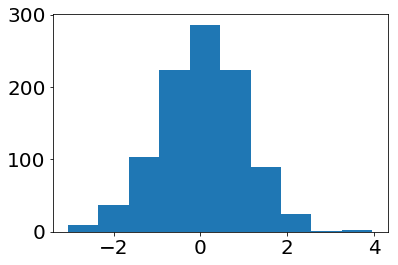

In [4]:
plt.hist(fullSample)

Now lets get a random percentage of this data and call it 'unique' to one or the other

In [5]:
percentageEast = 0.05
percentageWest = 0.025

numUniqueWest = int(percentageWest*len(fullSample))
numUniqueEast = int(percentageEast*len(fullSample))
print(numUniqueWest, numUniqueEast)

eastOnly = set(random.sample(fullSample, numUniqueEast))
eastOnly = [i for i in fullSample if i in eastOnly]
westAndCommon = [i for i in fullSample if i not in eastOnly]

westOnly = set(random.sample(westAndCommon, numUniqueEast))
westOnly = [i for i in westAndCommon if i in westOnly]
commonOnly = [i for i in westAndCommon if i not in westOnly]

25 50


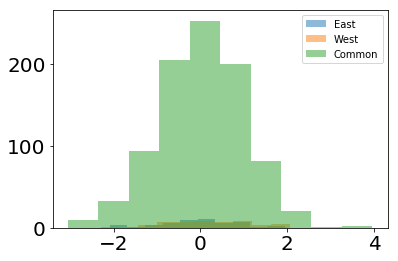

In [6]:
plt.hist(eastOnly, label='East', alpha=0.5)
plt.hist(westOnly, label='West', alpha=0.5)
plt.hist(commonOnly, label='Common', alpha=0.5)
plt.legend()
plt.show()

In [7]:
hEast = r.TH1D("hEast","East",100,-5,5)
for x in commonOnly:
    hEast.Fill(x)

hWest = hEast.Clone("hWest")
hWest.SetTitle("West")

In [8]:
for x in westOnly:
    hWest.Fill(x)
for x in eastOnly:
    hEast.Fill(x)

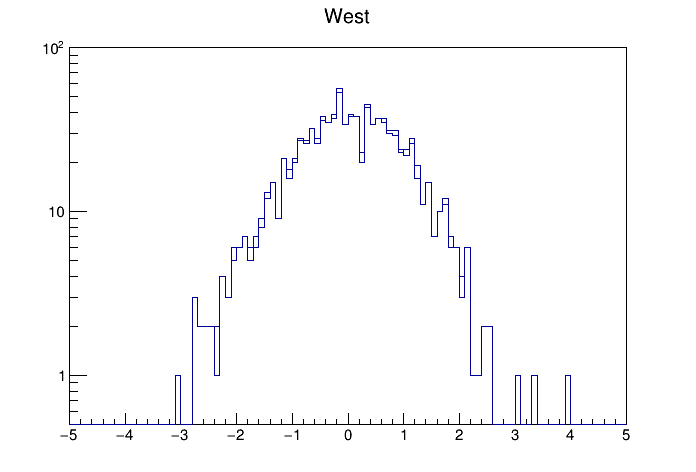

In [9]:
c = r.TCanvas()
hWest.Draw()
hEast.Draw("same")
c.SetLogy()
c.Draw()

In [10]:
funcWest = r.TF1("funcWest","gaus",-5,5)
funcWest.SetParameters(1,1,1)
funcEast = r.TF1("funcEast","gaus",-5,5)
funcEast.SetParameters(1,1,1)

 FCN=54.3344 FROM MIGRAD    STATUS=CONVERGED      65 CALLS          66 TOTAL
                     EDM=6.83821e-09    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     3.73445e+01   1.59473e+00   4.53217e-03   5.01139e-05
   2  Mean         4.06852e-02   3.29911e-02   1.19063e-04  -9.74209e-04
   3  Sigma        9.61394e-01   2.65831e-02   2.57241e-05   1.53860e-02


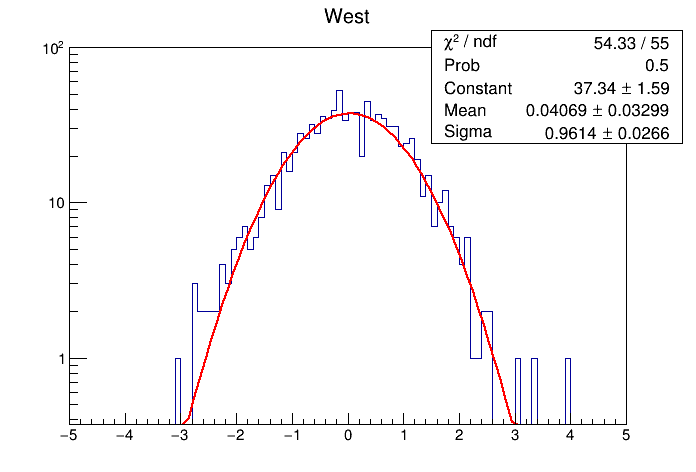

In [11]:
c = r.TCanvas()
hWest.Draw()
hWest.Fit("funcWest")
c.SetLogy()
c.Draw()

 FCN=49.3979 FROM MIGRAD    STATUS=CONVERGED      67 CALLS          68 TOTAL
                     EDM=2.50828e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     3.78958e+01   1.60921e+00   4.37712e-03   1.11510e-04
   2  Mean         2.80519e-02   3.25414e-02   1.12081e-04  -2.34093e-03
   3  Sigma        9.52215e-01   2.59915e-02   2.42378e-05   2.90470e-02


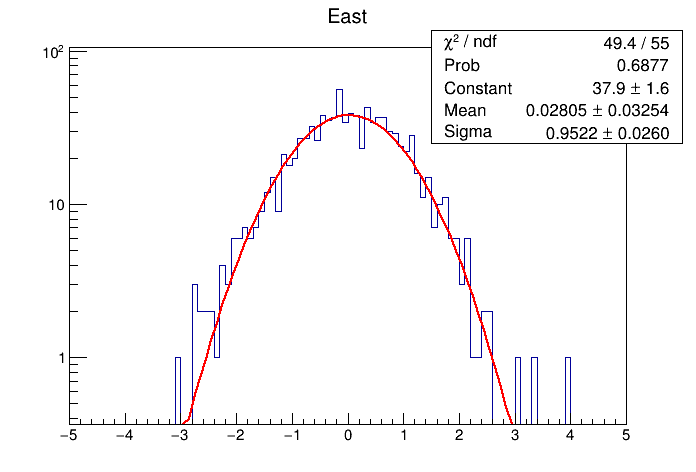

In [12]:
c = r.TCanvas()
hEast.Draw()
hEast.Fit("funcEast")
c.SetLogy()
c.Draw()

### Cool, now lets put this into a loop

In [1]:
from standardInclude import *
import random

Welcome to JupyROOT 6.12/06
For interactive plots, run: setint()
To return to non-interactive plots (default state), run: noint()


In [101]:
parsWest = []
parsEast = []
parsWestErr = []
parsEastErr = []

parsFull = []
parsFullErr = []

nLoops = 500
nRandom = 10000
percentageEast = 0.0547
percentageWest = 0.0232

trueMean = 0
trueStd = 1.0

for i in range(nLoops):
    print("Starting Random Loop",i+1, "/", nLoops)
    
    np.random.seed(seed=i)
    fullSample = [x for x in np.random.normal(loc=trueMean, scale=trueStd, size=nRandom)]

    numUniqueWest = int(percentageWest*len(fullSample))
    numUniqueEast = int(percentageEast*len(fullSample))
    #print(numUniqueWest, numUniqueEast)

    eastOnly = set(random.sample(fullSample, numUniqueEast))
    eastOnly = [i for i in fullSample if i in eastOnly]
    westAndCommon = [i for i in fullSample if i not in eastOnly]
    
    westOnly = set(random.sample(westAndCommon, numUniqueEast))
    westOnly = [i for i in westAndCommon if i in westOnly]
    commonOnly = [i for i in westAndCommon if i not in westOnly]
    
    hEast = r.TH1D("hEast","East",100,-5,5)
    hFull = hEast.Clone("hFull")
    for x in commonOnly:
        hEast.Fill(x)

    hWest = hEast.Clone("hWest")
    hWest.SetTitle("West")
    
    for x in westOnly:
        hWest.Fill(x)
    for x in eastOnly:
        hEast.Fill(x)
        
    for x in fullSample:
        hFull.Fill(x)
        
    funcWest = r.TF1("funcWest","gaus",-5,5)
    funcWest.SetParameters(1,1,1)
    funcEast = r.TF1("funcEast","gaus",-5,5)
    funcEast.SetParameters(1,1,1)
    funcFull = r.TF1("funcFull","gaus",-5,5)
    funcFull.SetParameters(1,1,1)
        
    hWest.Fit("funcWest","Q")
    hEast.Fit("funcEast","Q")
    hFull.Fit("funcFull","Q")
    
    pWesti = [funcWest.GetParameter(x) for x in range(3)]
    pWestErri = [funcWest.GetParError(x) for x in range(3)]
    pEasti = [funcEast.GetParameter(x) for x in range(3)]
    pEastErri = [funcEast.GetParError(x) for x in range(3)]
    pFulli = [funcFull.GetParameter(x) for x in range(3)]
    pFullErri = [funcFull.GetParError(x) for x in range(3)]
    
    parsWest.append(pWesti)
    parsWestErr.append(pWestErri)
    parsEast.append(pEasti)
    parsEastErr.append(pEastErri)
    parsFull.append(pFulli)
    parsFullErr.append(pFullErri)
    
print("All done.")

Starting Random Loop 1 / 500
Starting Random Loop 2 / 500
Starting Random Loop 3 / 500
Starting Random Loop 4 / 500
Starting Random Loop 5 / 500
Starting Random Loop 6 / 500
Starting Random Loop 7 / 500
Starting Random Loop 8 / 500
Starting Random Loop 9 / 500
Starting Random Loop 10 / 500
Starting Random Loop 11 / 500
Starting Random Loop 12 / 500
Starting Random Loop 13 / 500
Starting Random Loop 14 / 500
Starting Random Loop 15 / 500
Starting Random Loop 16 / 500
Starting Random Loop 17 / 500
Starting Random Loop 18 / 500
Starting Random Loop 19 / 500
Starting Random Loop 20 / 500
Starting Random Loop 21 / 500
Starting Random Loop 22 / 500
Starting Random Loop 23 / 500
Starting Random Loop 24 / 500
Starting Random Loop 25 / 500
Starting Random Loop 26 / 500
Starting Random Loop 27 / 500
Starting Random Loop 28 / 500
Starting Random Loop 29 / 500
Starting Random Loop 30 / 500
Starting Random Loop 31 / 500
Starting Random Loop 32 / 500
Starting Random Loop 33 / 500
Starting Random Loo

Warning in <TROOT::Append>: Replacing existing TH1: hEast (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hEast (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hEast (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hEast (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hEast (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hEast (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hEast (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hEast (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hEast (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hEast (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hEast (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hEast (Potential memory leak).
Warn

In [102]:
nWest, meanWest, sigmaWest = zip(*parsWest)
nWestErr, meanWestErr, sigmaWestErr = zip(*parsWestErr)
nEast, meanEast, sigmaEast = zip(*parsEast)
nEastErr, meanEastErr, sigmaEastErr = zip(*parsEastErr)

nFull, meanFull, sigmaFull = zip(*parsFull)
nFullErr, meanFullErr, sigmaFullErr = zip(*parsFullErr)

In [116]:
deltaMeanWest = [x-y for x,y in zip(meanWest, meanFull)]
deltaMeanEast = [x-y for x,y in zip(meanEast, meanFull)]

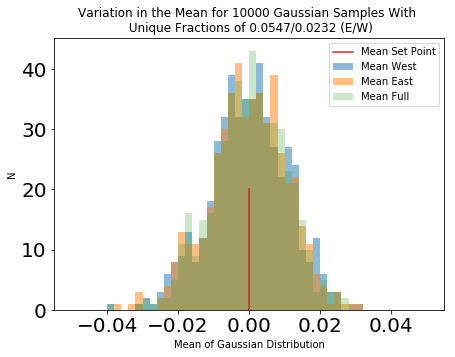

In [124]:
fig,ax = plt.subplots(figsize=(7,5))
plt.title("Variation in the Mean for "+str(nRandom)+" Gaussian Samples With \n Unique Fractions of "
          +str(percentageEast)+"/"+str(percentageWest)+" (E/W)")
plt.ylabel("N")
plt.xlabel("Mean of Gaussian Distribution")
plt.hist(meanWest,label="Mean West",alpha = 0.5, bins=50, range=(-.05,.05))
plt.hist(meanEast,label="Mean East",alpha = 0.5, bins=50, range=(-.05,.05))
plt.hist(meanFull,label="Mean Full",alpha = 0.25, bins=50, range=(-.05,.05))
plt.plot([trueMean,trueMean],[0,20],label='Mean Set Point')
plt.legend()
plt.show()

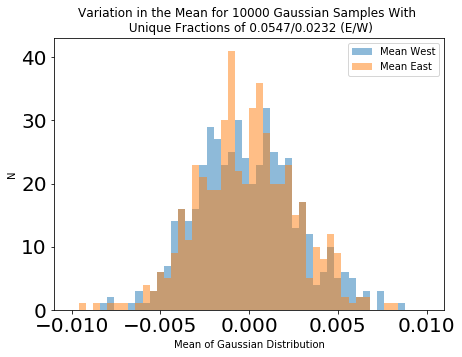

In [125]:
fig,ax = plt.subplots(figsize=(7,5))
plt.title("Variation in the Mean for "+str(nRandom)+" Gaussian Samples With \n Unique Fractions of "
          +str(percentageEast)+"/"+str(percentageWest)+" (E/W)")
plt.ylabel("N")
plt.xlabel("Mean of Gaussian Distribution")
plt.hist(deltaMeanWest,label="Mean West",alpha = 0.5, bins=50, range=(-.01,.01))
plt.hist(deltaMeanEast,label="Mean East",alpha = 0.5, bins=50, range=(-.01,.01))
plt.legend()
plt.show()

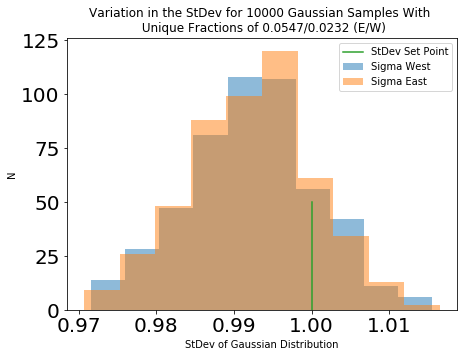

In [119]:
fig,ax = plt.subplots(figsize=(7,5))
plt.title("Variation in the StDev for "+str(nRandom)+" Gaussian Samples With \n Unique Fractions of "
          +str(percentageEast)+"/"+str(percentageWest)+" (E/W)")
plt.ylabel("N")
plt.xlabel("StDev of Gaussian Distribution")
plt.hist(sigmaWest,label="Sigma West",alpha = 0.5)
plt.hist(sigmaEast,label="Sigma East",alpha = 0.5)
plt.plot([trueStd,trueStd],[0,50],label='StDev Set Point')
plt.legend()
plt.show()

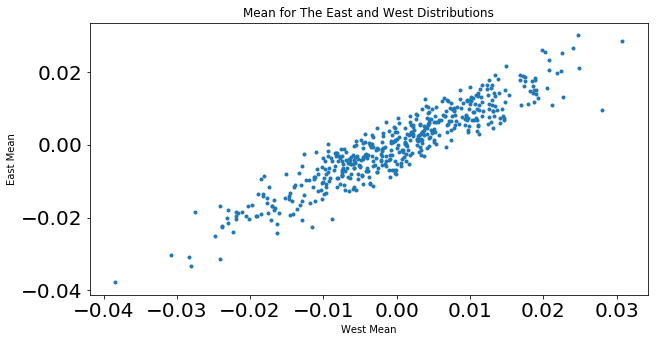

In [120]:
fig,ax = plt.subplots(figsize=(10,5))
plt.title("Mean for The East and West Distributions")
plt.xlabel("West Mean")
plt.ylabel("East Mean")
#plt.errorbar(meanWest,meanEast,meanWestErr,meanEastErr)
plt.plot(meanWest,meanEast,".")
plt.show()

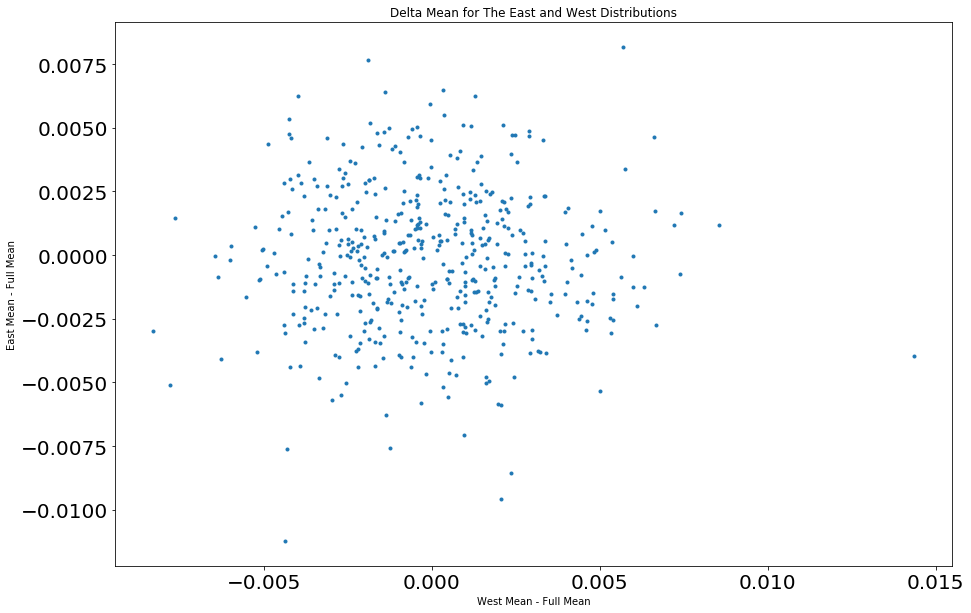

In [121]:
fig,ax = plt.subplots(figsize=(15,10))
plt.title("Delta Mean for The East and West Distributions")
plt.xlabel("West Mean - Full Mean")
plt.ylabel("East Mean - Full Mean")
#plt.errorbar(meanWest,meanEast,meanWestErr,meanEastErr)
plt.plot(deltaMeanWest,deltaMeanEast,".")
plt.show()

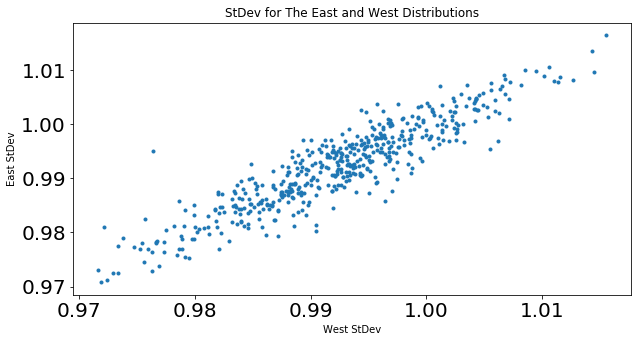

In [122]:
fig,ax = plt.subplots(figsize=(10,5))
plt.title("StDev for The East and West Distributions")
plt.xlabel("West StDev")
plt.ylabel("East StDev")
#plt.errorbar(sigmaWest,sigmaEast,sigmaWestErr,sigmaEastErr)
plt.plot(sigmaWest,sigmaEast,".")
plt.show()